# Введение
Базовая статистика для начинающих
* [Гистограмма](#1)
* [Выбросы](#2)
* [Ящик с усами](#3)
* [Сводная статистика](#4)
* [CDF](#5)
* [Размер эффекта](#6)
* [Взаимосвязь между переменными](#7)
* [Корреляция](#8)
* [Ковариация](#9)
* [Коэффициент корреляции Пирсона](#10)
* [Ранговая корреляция Спирмена](#11)
* [Среднее против медианы](#12)
* [Проверка гипотез](#13)
* [Нормальное (Гауссовское) распределение и z-оценка](#14)



In [ ]:
! pip install pandas
!pip install -q gdown

### Датасет
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from google.colab import files
uploaded = files.upload()
import gdown


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Saving data.csv to data.csv


In [ ]:
# read data as pandas data frame
data = pd.read_csv("data.csv")
data = data.drop(['Unnamed: 32','id'],axis = 1)

# Задание 1 кратко методами pandas проаннализируйте датасет

In [44]:
data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [47]:
data.shape

(569, 31)

In [48]:
data.isnull().sum()


,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [49]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212



## Гистограмма
* Сколько раз каждое значение появляется в наборе данных. Это описание называется распределением переменной.
* Наиболее распространенный способ представления распределения переменной - гистограмма, которая представляет собой график, показывающий частоту каждого значения.
* Частота = количество раз, которое каждое значение появляется
* Пример: [1,1,1,1,2,2,2]. Частота 1 равна четырем, а частота 2 равна трем.


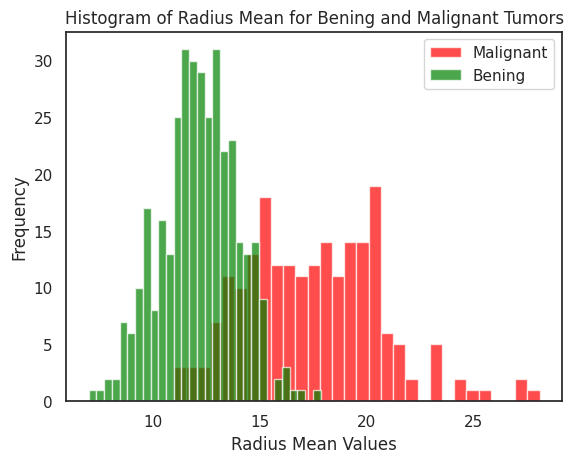

Most frequent malignant radius mean is:  20.101999999999997


In [50]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = 'red',alpha=0.7,color='red',label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = 'green',alpha=0.7,color='green',label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

* Давайте посмотрим на другие выводы
* Из этого графика видно, что средний радиус злокачественных опухолей в основном больше, чем средний радиус доброкачественных опухолей.
* Распределение доброкачественных опухолей (зеленый на графике) имеет приблизительно колоколообразную форму, что является формой нормального распределения (гауссовского распределения).
* Также вы можете найти такой результат, как наиболее частый средний радиус злокачественных опухолей.



## Выбросы
* При просмотре гистограммы видно, что в распределении доброкачественных опухолей (зеленый на графике) есть редкие значения.
* Эти значения могут быть ошибками или редкими событиями.
* Эти ошибки и редкие события можно назвать выбросами.
* Расчет выбросов:
  * сначала нужно рассчитать первый квартиль (Q1)(25%)
  * затем найти IQR (межквартильный размах) = Q3-Q1
  * наконец, вычислить Q1 - 1.5*IQR и Q3 + 1.5*IQR
  * Все, что находится за пределами этого диапазона, является выбросом.
  * давайте напишем код для распределения доброкачественной опухоли по признаку среднего радиуса


In [51]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
#YOUR code
Q1 = desc['25%']
print(f"Первый квартиль (Q1) через describe: {Q1}")
Q3 = desc['75%']
print(f'3-й квартиль: {Q3}')
IQR = Q3 - Q1
lower_bound = Q1 - (1.5* IQR)
upper_bound = Q3 + (1.5 * IQR)
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Первый квартиль (Q1) через describe: 11.08
3-й квартиль: 13.37
Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]



## Ящик с усами
* Вы также можете увидеть выбросы на ящиковых диаграммах.
* Мы нашли 3 выброса в среднем радиусе доброкачественных опухолей, и на ящиковой диаграмме есть 3 выброса.


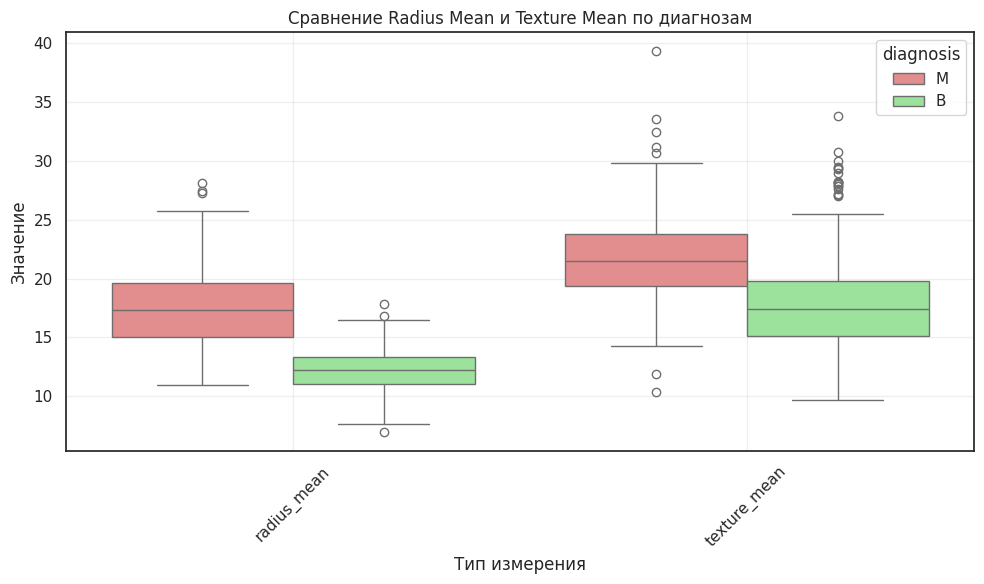

In [52]:
melted_data = pd.melt(data, id_vars="diagnosis", value_vars=['radius_mean', 'texture_mean'])

### Выведете Box Plot на основе melted data
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_data, x='variable', y='value', hue='diagnosis',
            palette={'B': 'lightgreen', 'M': 'lightcoral'})
plt.title('Сравнение Radius Mean и Texture Mean по диагнозам')
plt.xlabel('Тип измерения')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3) #сетка
plt.tight_layout()
plt.show()
plt.show()



## Сводная статистика
* Среднее значение
* Дисперсия: разброс распределения
* Стандартное отклонение: квадратный корень из дисперсии
* Давайте посмотрим на сводную статистику среднего радиуса доброкачественных опухолей.


In [53]:
data_bening = data[data["diagnosis"] == "B"]

print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.146523809523808
variance:  3.170221722043872
standart deviation (std):  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


<a id="5"></a> <br>
## CDF
Интегральная функция распределения (Cumulative distribution function, CDF) — это вероятность того, что случайная переменная примет значение, меньшее или равное x. Формула: P(X <= x).
Давайте объясним это на примере графика CDF для среднего радиуса доброкачественных опухолей.
На графике мы можем задать вопрос: какова вероятность, что средний радиус будет меньше или равен 12? Ответ — 0.5. Это означает, что вероятность того, что переменная (средний радиус) примет значение 12 или меньше, составляет 0.5.
Построить график CDF можно двумя разными способами.

**Задание:** Постройте график интегральной функции распределения (CDF) для среднего радиуса доброкачественных опухолей.

(array([0.00773149, 0.00773149, 0.01546299, 0.01546299, 0.05412046,
        0.04638897, 0.07731494, 0.13143541, 0.06185196, 0.12370391,
        0.10050943, 0.19328736, 0.23967633, 0.23194483, 0.22421334,
        0.19328736, 0.23967633, 0.17009288, 0.17782437, 0.10824092,
        0.10050943, 0.10824092, 0.06958345, 0.        , 0.01546299,
        0.02319448, 0.00773149, 0.00773149, 0.        , 0.00773149]),
 array([ 6.981 ,  7.3433,  7.7056,  8.0679,  8.4302,  8.7925,  9.1548,
         9.5171,  9.8794, 10.2417, 10.604 , 10.9663, 11.3286, 11.6909,
        12.0532, 12.4155, 12.7778, 13.1401, 13.5024, 13.8647, 14.227 ,
        14.5893, 14.9516, 15.3139, 15.6762, 16.0385, 16.4008, 16.7631,
        17.1254, 17.4877, 17.85  ]),
 <BarContainer object of 30 artists>)

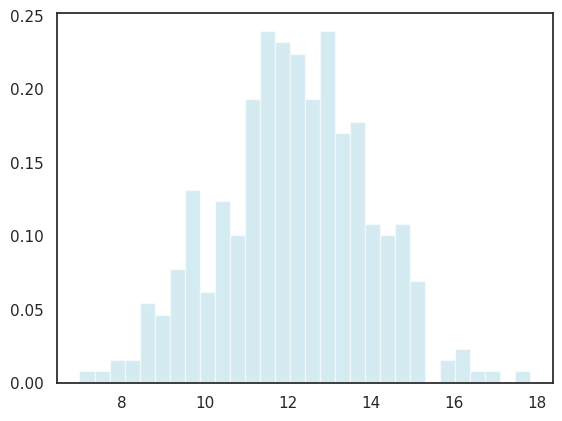

In [54]:
# 1. Данные для гистограммы
plt.hist(data_bening['radius_mean'], bins=30, density=True, alpha=0.5, color='lightblue')

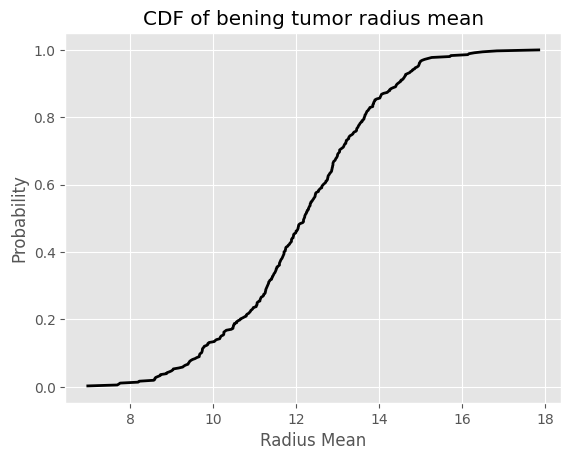

In [ ]:

# 2. Данные для CDF
sorted_data = np.sort(data_bening['radius_mean'])
y = np.arange(1, len(sorted_data)+1) / len(sorted_data)

# 3. Построение CDF
plt.plot(sorted_data, y, color='black', linewidth=2)

plt.title('CDF of bening tumor radius mean')
plt.xlabel('Radius Mean')
plt.ylabel('Probability')
plt.show()


## Размер эффекта
* Одна из сводных статистик.
* Она описывает размер эффекта. Это простой способ количественной оценки различия между двумя группами.
* Другими словами, размер эффекта подчеркивает размер различия.
* Используйте размер эффекта Коэна.
* Коэн предполагает, что если d (размер эффекта) = 0.2, это маленький размер эффекта, d = 0.5 - средний размер эффекта, d = 0.8 - большой размер эффекта.
* Давайте сравним размер эффекта между средним радиусом доброкачественных опухолей и средним радиусом злокачественных опухолей.
* Размер эффекта равен 2.2, что слишком велико и говорит о том, что две группы отличаются друг от друга, как мы и ожидали. Потому что наши группы - это средний радиус доброкачественных опухолей и средний радиус злокачественных опухолей, которые отличаются друг от друга.


In [55]:

data_bening = pd.to_numeric(data[data["diagnosis"] == "B"]["radius_mean"], errors='coerce')
data_malignant = pd.to_numeric(data[data["diagnosis"] == "M"]["radius_mean"], errors='coerce') # Фильтруем данные по диагнозу "B" (доброкачественные) и преобразуем столбец radius_mean в числовой формат
# errors='coerce' преобразует нечисловые значения в NaN
mean_b = data_bening.mean()
mean_m = data_malignant.mean()
std_b = data_bening.std()
std_m = data_malignant.std()

# формула Коэна
effect_size = (mean_b - mean_m) / np.sqrt((std_b**2 + std_m**2) / 2)

print(f"Размер эффекта: {effect_size:.2f}")

Размер эффекта: -2.05



## Взаимосвязь между переменными
* Мы можем сказать, что две переменные связаны друг с другом, если одна из них дает информацию о других.
* Например, цена и расстояние. Если вы едете на такси на большое расстояние, вы заплатите больше. Поэтому мы можем сказать, что цена и расстояние положительно связаны друг с другом.
* Диаграмма рассеяния
* Самый простой способ проверить взаимосвязь между двумя переменными.
* Давайте посмотрим на взаимосвязь между средним радиусом и средней площадью.
* На диаграмме рассеяния видно, что при увеличении среднего радиуса увеличивается и средняя площадь. Следовательно, они положительно коррелируют друг с другом.
* Нет корреляции между средней площадью и фрактальной размерностью se. Потому что при изменении средней площади фрактальная размерность se не зависит от изменения средней площади.


<Figure size 1500x1000 with 0 Axes>

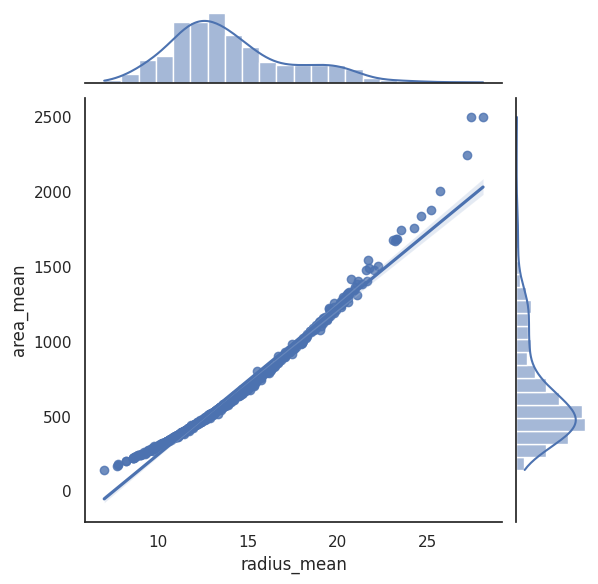

In [56]:
plt.figure(figsize = (15,10))
sns.jointplot(x="radius_mean", y="area_mean", data=data, kind="reg")
plt.show()

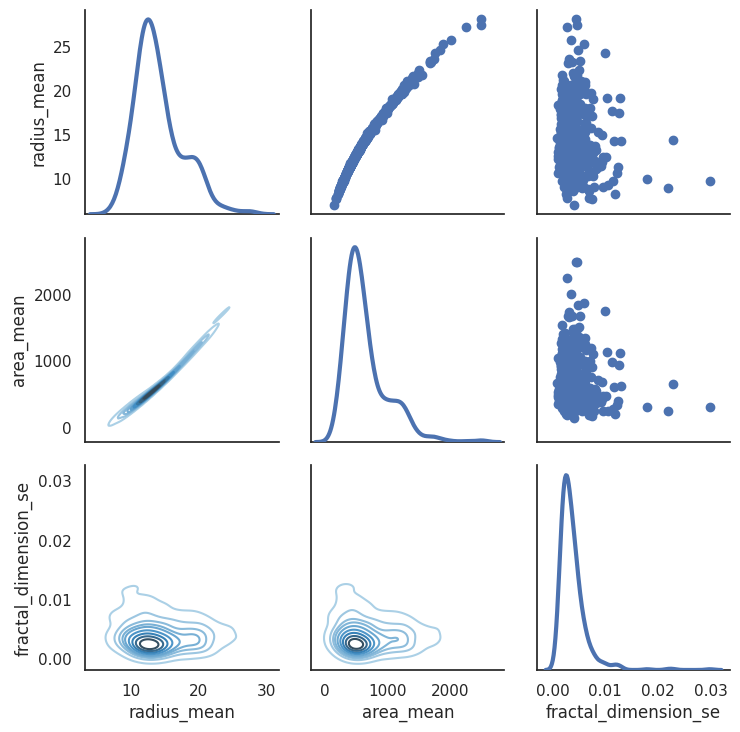

In [57]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()


## Корреляция
* Сила взаимосвязи между двумя переменными.
* Давайте посмотрим на корреляцию между всеми признаками.


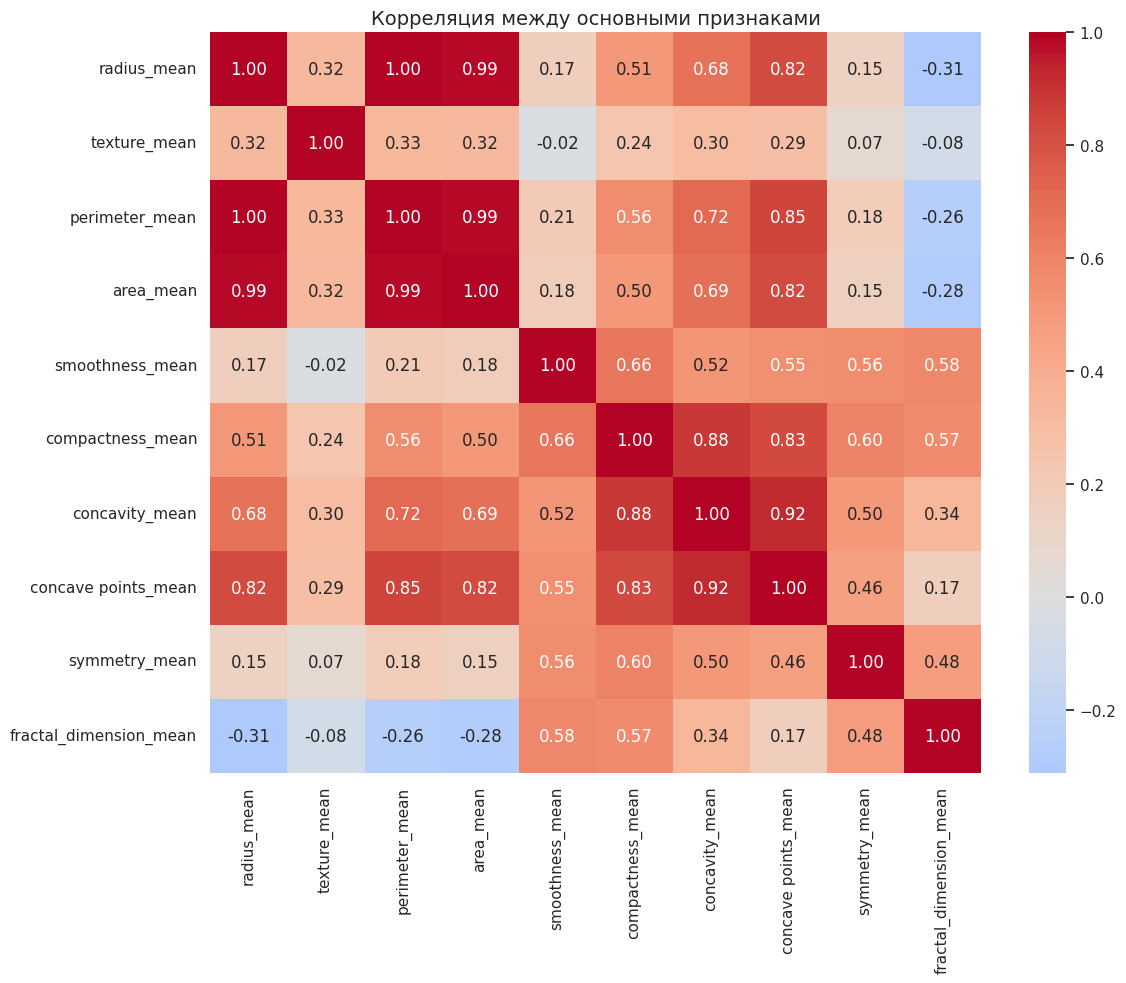

In [58]:

main_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

plt.figure(figsize=(12, 10))
sns.heatmap(data[main_features].corr(),
            annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляция между основными признаками', fontsize=14)
plt.tight_layout()
plt.show()


## Ковариация
* Ковариация - это мера тенденции двух переменных изменяться вместе.
* Таким образом, ковариация максимальна, если два вектора идентичны.
* Ковариация равна нулю, если они ортогональны.
* Ковариация отрицательна, если они направлены в противоположные стороны.
* Давайте посмотрим на ковариацию между средним радиусом и средней площадью. Затем посмотрим на средний радиус и фрактальную размерность se.


In [59]:
print(np.cov(df['radius_mean'], df['area_mean']))
print(np.cov(df['radius_mean'], df['fractal_dimension_se']))
#вывод: у первых есть достаточно сильная связь. у второй пары слабая - значения почти не связаны линейно !!!!!!!

[[1.24189201e+01 1.22448341e+03]
 [1.22448341e+03 1.23843554e+05]]
[[ 1.24189201e+01 -3.97624858e-04]
 [-3.97624858e-04  7.00169156e-06]]



## Коэффициент корреляции Пирсона
* Частное от деления ковариации на стандартное отклонение переменных.
* Давайте посмотрим на коэффициент корреляции Пирсона между средним радиусом и средней площадью.
* Сначала давайте используем метод .corr(), который мы фактически использовали в части корреляции. В части корреляции мы фактически использовали коэффициент корреляции Пирсона :)
* p1 и p2 одинаковы. В p1 мы используем метод corr(), в p2 мы применяем определение коэффициента корреляции Пирсона (cov(A,B)/(std(A)*std(B)))
* Как мы и ожидали, коэффициент корреляции Пирсона между средней площадью и средней площадью равен 1, что означает, что они имеют одинаковое распределение.
* Также коэффициент корреляции Пирсона между средней площадью и средним радиусом равен 0.98, что означает, что они положительно коррелируют друг с другом, и взаимосвязь между ними очень высока.
* Чтобы было понятнее, то, что мы делали в части корреляции и в части коэффициента корреляции Пирсона, одно и то же.


In [60]:

cov_ab = data['radius_mean'].cov(data['area_mean'])
std_a = data['radius_mean'].std()
std_b = data['area_mean'].std()
p2 = cov_ab / (std_a * std_b)
print(f'Итак, p1 = {p1}, p2 = {p2}')

Итак, p1 = 0.9873571700566127, p2 = 0.9873571700566132



## Ранговая корреляция Спирмена
* Коэффициент корреляции Пирсона хорошо работает, если взаимосвязь между переменными линейна и переменные примерно нормальны. Но он не устойчив, если есть выбросы.
* Для вычисления корреляции Спирмена нам нужно вычислить ранг каждого значения.


In [61]:
ranked_data = data.rank()
spearman_corr = ranked_data['radius_mean'].corr(ranked_data['area_mean'])
print(f'Корреляция Спирмена (через ранги): {spearman_corr}')

Корреляция Спирмена (через ранги): 0.9996020278067481


* Корреляция Спирмена немного выше, чем корреляция Пирсона.
  * Если взаимосвязь между распределениями нелинейна, корреляция Спирмена, как правило, лучше оценивает силу взаимосвязи.
  * Коэффициент корреляции Пирсона может быть подвержен влиянию выбросов. Корреляция Спирмена более устойчива.



## Среднее против медианы
* Иногда вместо среднего значения нам нужно использовать медиану. Я объясню, почему нам нужно использовать медиану, на примере.
* Давайте представим, что в компании работают 10 человек. Начальник компании повысит им зарплату, если среднее значение их зарплаты меньше 5.


In [62]:
salary = [1,4,3,2,5,4,2,3,1, 500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


* Среднее значение зарплаты составляет 52.5, поэтому начальник думает, что он слишком много платит своим сотрудникам. И не повышает им зарплату. Однако, как вы знаете, это несправедливо, и 500 (зарплата) является выбросом для этого списка зарплат.
* Медиана избегает выбросов.


In [63]:
print("Median of salary: ",np.median(salary))

Median of salary:  3.0


* Теперь медиана зарплаты равна 3, что меньше 5, и сотрудники получат повышение зарплаты, они счастливы, и эта ситуация справедлива :)



## Проверка гипотез
* Классическая проверка гипотез
* Мы хотим ответить на этот вопрос: "учитывая выборку и видимый эффект, какова вероятность увидеть такой эффект случайно?"
* Первый шаг - количественно оценить размер видимого эффекта, выбрав тестовую статистику. Естественный выбор для тестовой статистики - разница в средних значениях между двумя группами.
* Второй шаг - определить нулевую гипотезу, которая является моделью системы, основанной на предположении, что видимый эффект не реален. Нулевая гипотеза - это тип гипотезы, используемый в статистике, который предполагает отсутствие статистической значимости в наборе заданных наблюдений. Нулевая гипотеза - это гипотеза, которую люди пытаются опровергнуть. Альтернативная гипотеза - это гипотеза, которую люди хотят попытаться доказать.
* Третий шаг - вычислить p-значение, которое является вероятностью увидеть видимый эффект, если нулевая гипотеза верна. Предположим, у нас есть тест нулевой гипотезы. Затем мы вычисляем p-значение. Если p-значение меньше или равно порогу, мы отвергаем нулевую гипотезу.
* Если p-значение низкое, эффект считается статистически значимым, что означает, что он вряд ли произошел случайно. Поэтому мы можем сказать, что эффект с большей вероятностью появится в более крупной популяции.
* Давайте приведем пример. Нулевая гипотеза: мир плоский. Альтернативная гипотеза: мир круглый. Несколько ученых решили опровергнуть нулевую гипотезу. Это в конечном итоге привело к отвержению нулевой гипотезы и принятию альтернативной гипотезы.
* Другой пример. "Этот эффект реален" - это нулевая гипотеза. Основываясь на этом предположении, мы вычисляем вероятность видимого эффекта. Это p-значение. Если p-значение низкое, мы делаем вывод, что нулевая гипотеза вряд ли верна.
* Теперь давайте приведем наш пример:
  * Я хочу узнать, связаны ли средний радиус и средняя площадь друг с другом? Моя нулевая гипотеза заключается в том, что "взаимосвязь между средним радиусом и средней площадью равна нулю в популяции опухолей".
  * Теперь нам нужно опровергнуть эту нулевую гипотезу, чтобы продемонстрировать, что средний радиус и средняя площадь связаны. (на самом деле мы знаем это из нашего предыдущего опыта)
  * давайте найдем p-значение (значение вероятности)


In [64]:
import numpy as np
from scipy.stats import t
r = data['radius_mean'].corr(data['area_mean'])
n = len(data)
t_statistic = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
p = 2 * t.sf(np.abs(t_statistic), df=n-2)
print(f"p-значение (Пирсон): {p}")

p-значение (Пирсон): 0.0


* P-значение почти равно нулю, поэтому мы можем отвергнуть нулевую гипотезу.


* P values is almost zero so we can reject null hypothesis.


## Нормальное (Гауссовское) распределение и z-оценка
* Также называется колоколообразным распределением.
* Вместо формального определения гауссовского распределения я хочу объяснить его на примере.
* Классический пример гауссовского распределения - это IQ.
  * В мире, допустим, средний IQ составляет 110.
  * Есть несколько человек, которые очень умны, и их IQ выше 110. Он может быть 140 или 150, но это редкость.
  * Также есть несколько человек с низким интеллектом, и их IQ ниже 110. Он может быть 40 или 50, но это редкость.
  * Из этой информации мы можем сказать, что средний IQ составляет 110. И допустим, стандартное отклонение равно 20.
  * Среднее и стандартное отклонение - это параметры нормального распределения.
  * Давайте создадим 100000 выборок и визуализируем их с помощью гистограммы.


mean:  109.9305375473392
standart deviation:  19.976401793515503


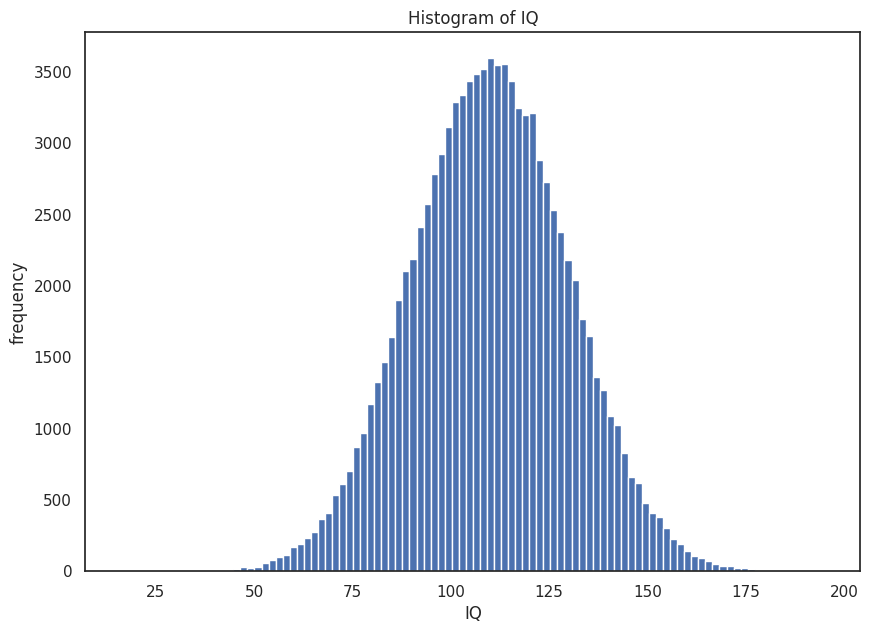

In [65]:
# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, density=False) # Changed normed to density
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

* Как видно из гистограммы, большинство людей сосредоточено около 110, что является средним значением нашего нормального распределения.
* Однако что такое "большинство", о котором я упомянул в предыдущем предложении? Что, если я хочу узнать, какой процент людей должен иметь IQ от 80 до 140?
* Мы будем использовать z-оценку, чтобы ответить на этот вопрос.
    * z = (x - среднее) / стандартное отклонение
    * z1 = (80-110)/20 = -1.5
    * z2 = (140-110)/20 = 1.5
    * Расстояние между средним значением и 80 составляет 1.5 стандартного отклонения, а расстояние между средним значением и 140 составляет 1.5 стандартного отклонения.
    * Если вы посмотрите на таблицу z-оценок, вы увидите, что 1.5 стандартного отклонения соответствует 0.4332.
 <a href="https://ibb.co/hys6OT"><img src="https://preview.ibb.co/fYzWq8/123.png" alt="123" border="0"></a>

      * Давайте рассчитаем это с 2, потому что 1 от 80 до среднего значения, а другое от среднего значения до 140.
      * 0.4332 * 2 = 0.8664
      * 86.64% людей имеют IQ от 80 до 140.
  <a href="https://ibb.co/fhc6OT"><img src="https://preview.ibb.co/bUi2xo/hist.png" alt="hist" border="0"></a>

* Какой процент людей должен иметь IQ меньше 80?
* z = (110-80)/20 = 1.5
* Давайте посмотрим на таблицу z-оценок 0.4332. 43.32% людей имеют IQ от 80 до среднего значения (110).
* Если мы вычтем из 50% 43.32%, мы сможем найти процент людей с IQ меньше 80.
* 50-43.32 = 6.68. В результате 6.68% людей имеют IQ меньше 80.


## последнее задание

Сделать Z оценку для данного датасета

1. сформулировать гипотезы
2. посчитать z-оценку
3. посчитать p-value
4. на основе уровня значимости $\alpha$ подтвердить/опровергнуть гипотезы

In [43]:
    #H₀: Средний радиус злокачественных и доброкачественных опухолей одинаковый
    #H₁: Средний радиус злокачественных и доброкачественных опухолей разный

In [90]:
print(f'кол-во доброкачественных опухолей  {len(data_bening)}')
print(f'кол-во злокач опухолей  {len(data_malignant)}')
print(f'средний радиус доброкач опух {data_bening.mean():.2f}')
print(f'средний радиус злокач опух {data_malignant.mean():.2f}')
# z - оценка
std_b = data_bening.std()
std_a = data_malignant.std()
len_b = len(data_bening)
len_a = len(data_malignant)
mean_b = data_bening.mean()
mean_a = data_malignant.mean()
var_a = std_a ** 2 #дисперсия
var_b = std_b ** 2 #дисперсия
z_score1 = (mean_b - mean_a)
z_score2 = ((var_b/len_b) + (var_a/len_a)) ** 0.5
z_score = z_score1/z_score2
print(abs(z_score))
#ищем p_value
from scipy.stats import norm
z_score = -22.21
p_value = 2 * norm.sf(abs(z_score))  # sf - survival function -_-
print(f"p-value: {p_value}")
print('-_-  -_-'' ' '-_-  -_-'' ' '-_-  -_-', ':)---(: Результаты проверки гипотезы ---', '-_-  -_-'' ' '-_-  -_-'' ' '-_-  -_-')
alpha = 0.05
if p_value < alpha:
  print(" Гипотеза H0 опровергнута")
  print(' H1 - достоверна')
  if p_value < 0.001:
        print(" С колоссальной достоверностью!")
else:
  print("H0 не опровергнута")
  print('H1 не достоверна')

кол-во доброкачественных опухолей  357
кол-во злокач опухолей  212
средний радиус доброкач опух 12.15
средний радиус злокач опух 17.46
22.20879775846453
p-value: 2.749376309248309e-109
-_-  -_- -_-  -_- -_-  -_- :)---(: Результаты проверки гипотезы --- -_-  -_- -_-  -_- -_-  -_-
 Гипотеза H0 опровергнута
 H1 - достоверна
 С колоссальной достоверностью!
